<a href="https://colab.research.google.com/github/vaibhaVkumar28/Burnt_calorie_detector/blob/main/calories_burnt_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and processing

In [118]:
# loading the data from csv files to Pandas Dataframe
calories=pd.read_csv('/content/calories.csv')

In [119]:
#print the first five rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [120]:
calories.iloc[10:31]

,User_ID,Calories
10,13723164,3.0
11,13681290,92.0
12,15566424,58.0
13,12891699,88.0
14,13823829,7.0
15,17557348,170.0
16,12198133,11.0
17,15236104,43.0
18,11042324,15.0
19,16864285,74.0


In [121]:
exercise_data=pd.read_csv('/content/exercise.csv')

In [122]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [123]:
exercise_data.iloc[10:31]  # Rows from index 10 to 20 (inclusive of 10, exclusive of 21)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
10,13723164,female,36,177.0,76.0,1.0,74.0,37.8
11,13681290,female,21,157.0,56.0,17.0,100.0,40.0
12,15566424,male,66,171.0,79.0,11.0,90.0,40.0
13,12891699,female,32,157.0,54.0,18.0,93.0,40.4
14,13823829,male,53,182.0,85.0,2.0,82.0,38.1
15,17557348,female,39,156.0,62.0,28.0,104.0,40.8
16,12198133,male,39,182.0,82.0,4.0,82.0,38.6
17,15236104,male,46,169.0,67.0,11.0,89.0,40.2
18,11042324,female,27,171.0,65.0,4.0,85.0,38.6
19,16864285,male,50,188.0,86.0,14.0,94.0,40.2


Combining the two dataframes

In [124]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [125]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [126]:
calories_data.iloc[10:31]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10,13723164,female,36,177.0,76.0,1.0,74.0,37.8,3.0
11,13681290,female,21,157.0,56.0,17.0,100.0,40.0,92.0
12,15566424,male,66,171.0,79.0,11.0,90.0,40.0,58.0
13,12891699,female,32,157.0,54.0,18.0,93.0,40.4,88.0
14,13823829,male,53,182.0,85.0,2.0,82.0,38.1,7.0
15,17557348,female,39,156.0,62.0,28.0,104.0,40.8,170.0
16,12198133,male,39,182.0,82.0,4.0,82.0,38.6,11.0
17,15236104,male,46,169.0,67.0,11.0,89.0,40.2,43.0
18,11042324,female,27,171.0,65.0,4.0,85.0,38.6,15.0
19,16864285,male,50,188.0,86.0,14.0,94.0,40.2,74.0


In [127]:
# checking the no of rows and columns
calories_data.shape

(15000, 9)

In [128]:
# getting some more information
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [129]:
#checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis


In [130]:
# getting the statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [131]:
sns.set()

/tmp/ipython-input-948611893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=calories_data, palette={'male': 'cyan', 'female': 'orange'})


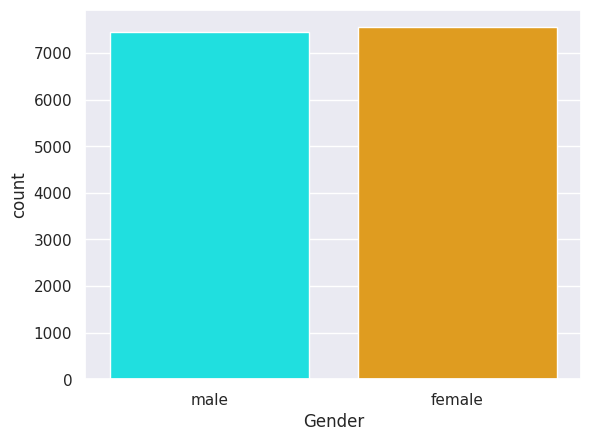

In [132]:
# plotting the gender in count plot
sns.countplot(x='Gender', data=calories_data, palette={'male': 'cyan', 'female': 'orange'})
plt.show()

/tmp/ipython-input-3926829232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

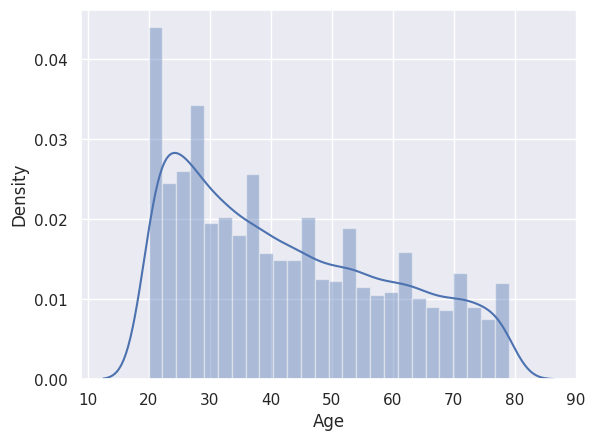

In [133]:
# Finding the distribution of 'Age' column
sns.distplot(calories_data['Age'])

/tmp/ipython-input-455544389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

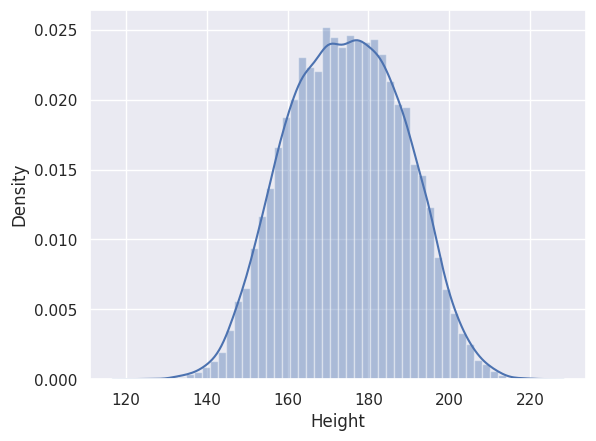

In [134]:
# finding the distribution for 'Height' column
sns.distplot(calories_data['Height'])

/tmp/ipython-input-1496483469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

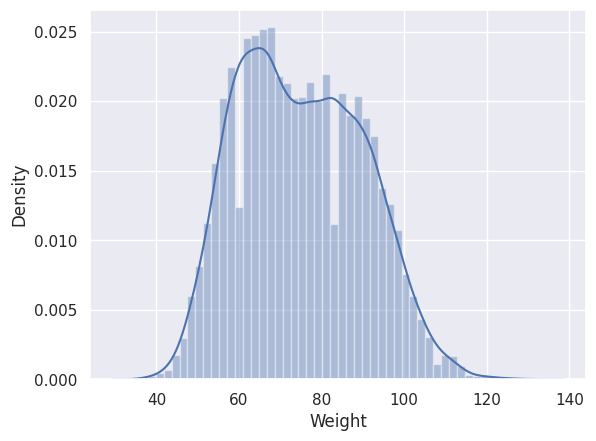

In [135]:
# finding distribution of 'weight' column
sns.distplot(calories_data['Weight'])

In [136]:
#converting the text data to numerical values
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

/tmp/ipython-input-1920798746.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)


Finding the correlation in the Dataset

In [137]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [138]:
calories_data.iloc[10:31]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10,13723164,1,36,177.0,76.0,1.0,74.0,37.8,3.0
11,13681290,1,21,157.0,56.0,17.0,100.0,40.0,92.0
12,15566424,0,66,171.0,79.0,11.0,90.0,40.0,58.0
13,12891699,1,32,157.0,54.0,18.0,93.0,40.4,88.0
14,13823829,0,53,182.0,85.0,2.0,82.0,38.1,7.0
15,17557348,1,39,156.0,62.0,28.0,104.0,40.8,170.0
16,12198133,0,39,182.0,82.0,4.0,82.0,38.6,11.0
17,15236104,0,46,169.0,67.0,11.0,89.0,40.2,43.0
18,11042324,1,27,171.0,65.0,4.0,85.0,38.6,15.0
19,16864285,0,50,188.0,86.0,14.0,94.0,40.2,74.0


In [139]:
correlation = calories_data.corr()

<Axes: >

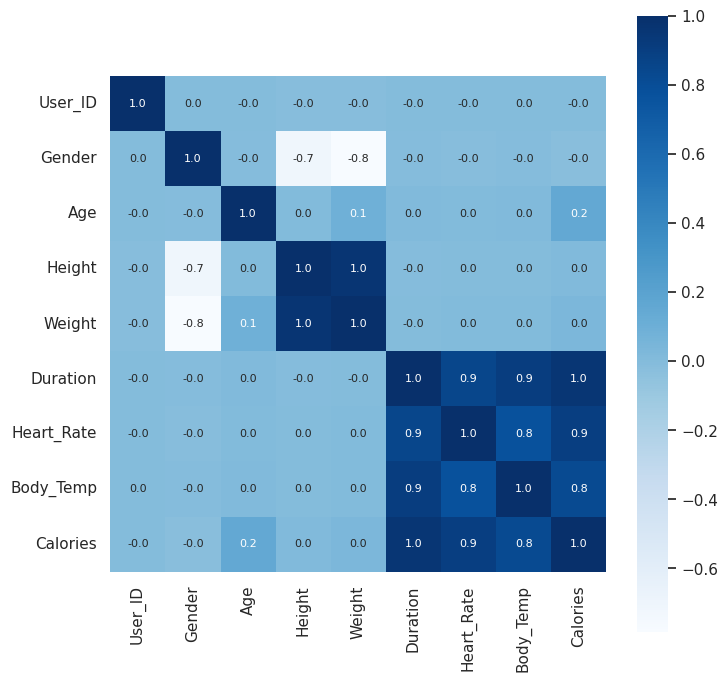

In [140]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Seperating features and target


In [141]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [142]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [143]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splliting the data into tranning data and Test data

In [144]:

print(calories_data['Duration'].describe())
print(f"Max duration in training: {calories_data['Duration'].max()}")


count    15000.000000
mean        15.530600
std          8.319203
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: Duration, dtype: float64
Max duration in training: 30.0


In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [146]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [147]:
# Baseline model
print("Training baseline model...")
baseline_model = XGBRegressor(random_state=2)
baseline_model.fit(X_train, Y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_mae = mean_absolute_error(Y_test, baseline_pred)

Training baseline model...


In [148]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\nStarting hyperparameter tuning...")
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=2),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)

print("\nBest parameters found: ", grid_search.best_params_)
tuned_model = grid_search.best_estimator_
tuned_pred = tuned_model.predict(X_test)
tuned_mae = mean_absolute_error(Y_test, tuned_pred)

accuracy_like = 100 - ((tuned_mae / Y_test.mean()) * 100)
print("Approximate Accuracy (%):", round(accuracy_like, 2))


Starting hyperparameter tuning...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Approximate Accuracy (%): 98.79


In [149]:
# Print comparison
print("\nModel Comparison:")
print(f"Baseline MAE: {baseline_mae:.2f} calories")
print(f"Tuned MAE: {tuned_mae:.2f} calories")
improvement = ((baseline_mae - tuned_mae) / baseline_mae) * 100
print(f"Improvement: {improvement:.1f}%")



Model Comparison:
Baseline MAE: 1.48 calories
Tuned MAE: 1.08 calories
Improvement: 27.4%


In [150]:
# Use the tuned model for predictions
model = tuned_model

Prediction of Test Data

In [151]:
test_data_prediction=model.predict(X_test)

In [152]:
print(test_data_prediction)

[128.29356  220.50127   38.276115 ... 145.15057   24.248392  89.41915 ]


AUC Score (Threshold = 200 ) = 0.9865576642597418


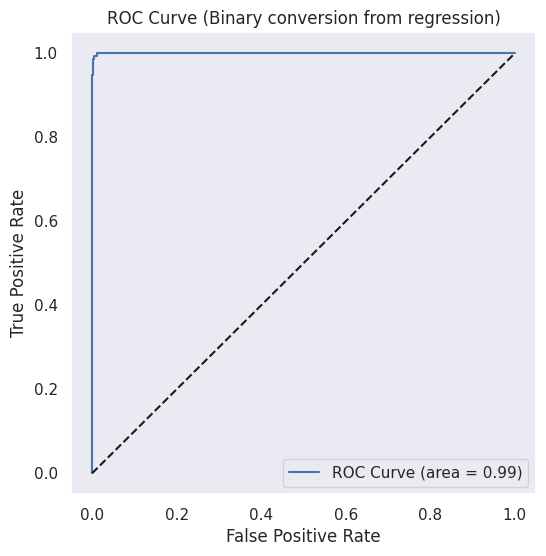

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve
threshold = 200  # example threshold
Y_test_class = (Y_test > threshold).astype(int)
pred_class_prob = (test_data_prediction > threshold).astype(int)

# Calculate AUC
auc = roc_auc_score(Y_test_class, pred_class_prob)
print("AUC Score (Threshold =", threshold, ") =", auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test_class, test_data_prediction)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Binary conversion from regression)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

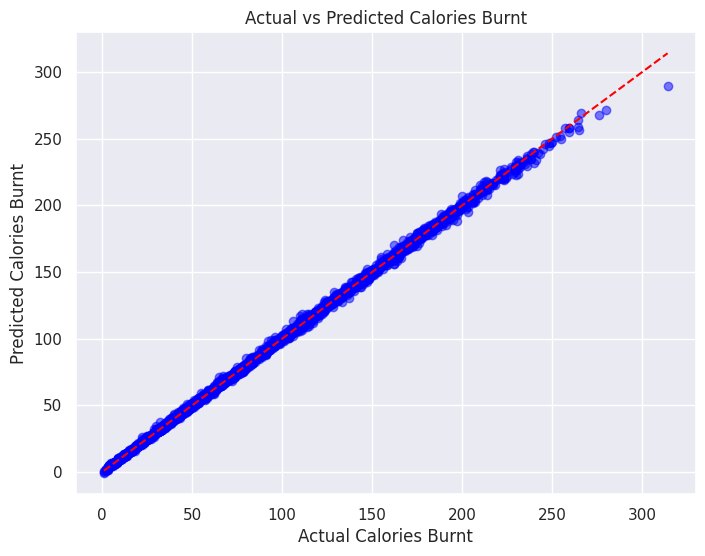

In [154]:
# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual vs Predicted Calories Burnt")
plt.show()

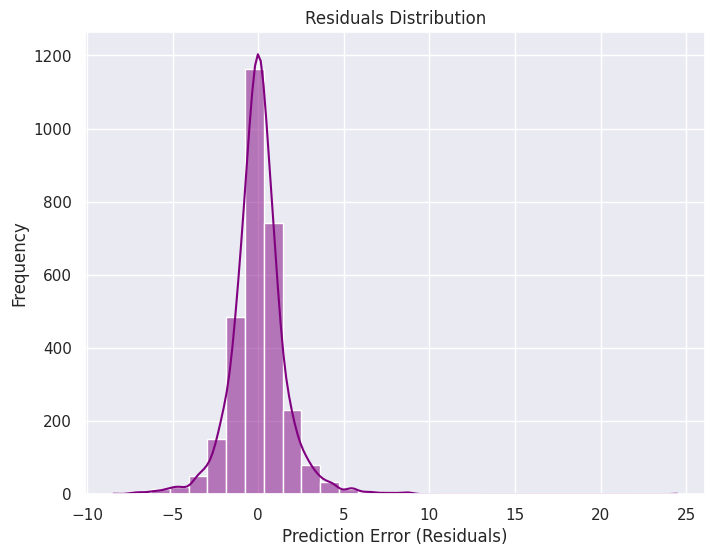

In [155]:
#Residual Distribution
residuals = Y_test - test_data_prediction

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()




/tmp/ipython-input-1499487224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


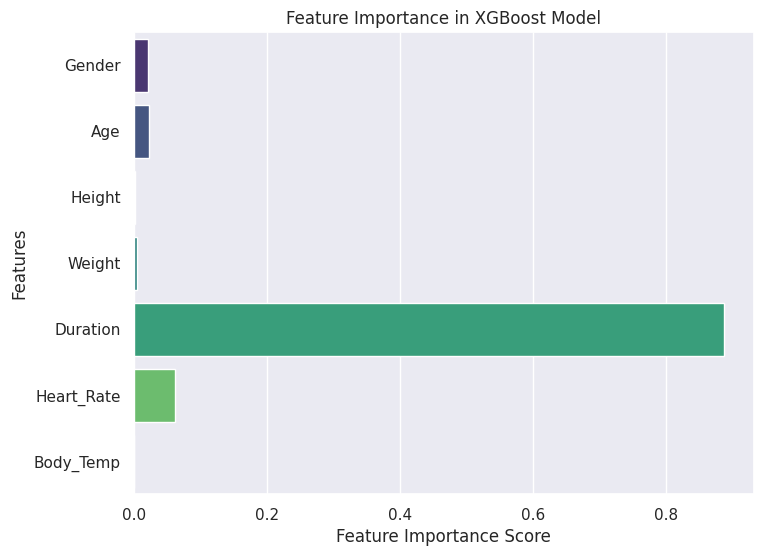

In [156]:
#Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()

Area under ROC curve

Building a predictive system

In [157]:
input_data=(0,68,190.0,94.0,29.0,105.0,40.8)


#changing data into a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


prediction=model.predict(input_data_reshaped)
print('Calories Burnt :',prediction[0])

Calories Burnt : 233.8


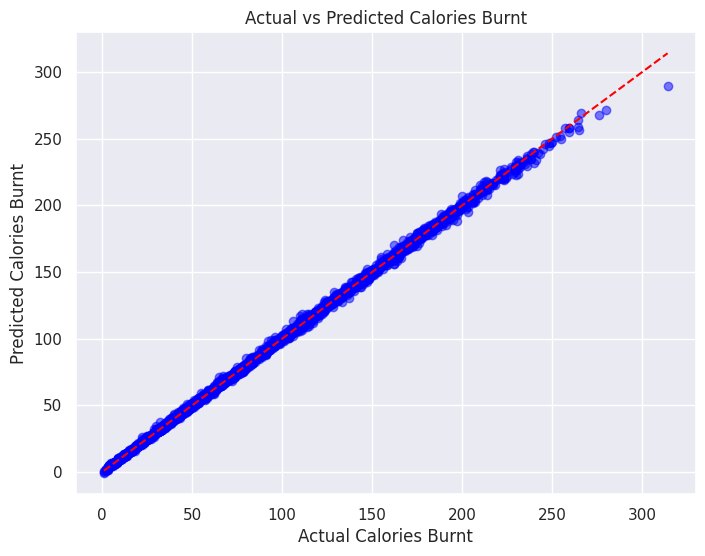

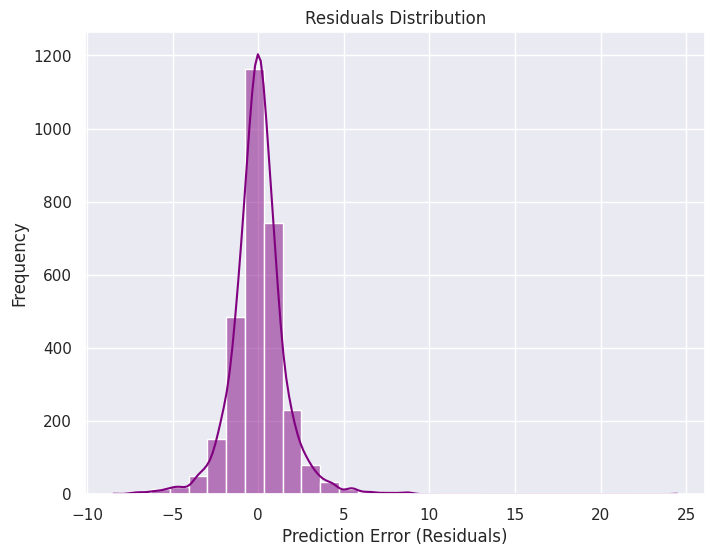

/tmp/ipython-input-3558503438.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


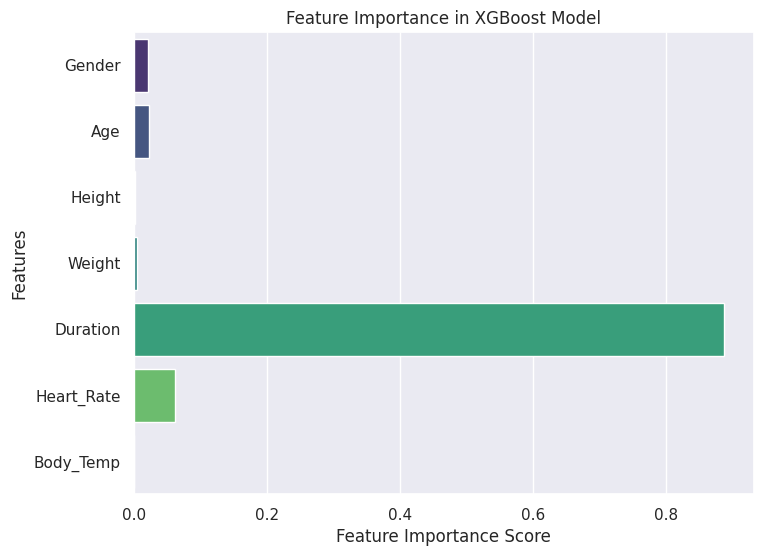

In [158]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual vs Predicted Calories Burnt")
plt.show()


residuals = Y_test - test_data_prediction

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()



importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()


In [159]:
from flask import Flask, request, jsonify
from google.colab.output import eval_js
# Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return  """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Burnt Calorie Detector</title>
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.10.0/font/bootstrap-icons.css">
        <style>
            body {
                background-color: #f8f9fa;
                font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
            }
            .card {
                border: none;
                border-radius: 15px;
                box-shadow: 0 6px 15px rgba(0, 0, 0, 0.08);
                overflow: hidden;
            }
            .card-header {
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                padding: 1.5rem;
            }
            .form-control, .form-select {
                border-radius: 8px;
                padding: 10px 15px;
                border: 1px solid #e0e0e0;
            }
            .form-control:focus, .form-select:focus {
                border-color: #667eea;
                box-shadow: 0 0 0 0.25rem rgba(102, 126, 234, 0.25);
            }
            .btn-primary {
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                border: none;
                padding: 12px 24px;
                font-weight: 500;
                letter-spacing: 0.5px;
                transition: all 0.3s ease;
            }
            .btn-primary:hover {
                transform: translateY(-2px);
                box-shadow: 0 4px 12px rgba(102, 126, 234, 0.3);
            }
            .result-card {
                background-color: white;
                border-left: 4px solid #667eea;
                opacity: 0;
                transition: opacity 0.5s ease;
            }
            .result-show {
                opacity: 1;
            }
            @media (max-width: 768px) {
                .card-body {
                    padding: 1.5rem;
                }
            }
        </style>
    </head>
    <body>
        <div class="container py-5">
            <div class="row justify-content-center">
                <div class="col-lg-8">
                    <div class="card">
                        <div class="card-header text-center">
                            <div class="d-flex justify-content-center align-items-center mb-3">
                                <i class="bi bi-calculator-fill fs-1 me-3"></i>
                                <h1 class="m-0">Calorie Expenditure Predictor</h1>
                            </div>
                            <p class="m-0">Calculate your estimated calorie burn during exercise</p>
                        </div>
                        <div class="card-body p-4">
                            <form id="predictForm">
                                <div class="row g-3">
                                    <div class="col-md-6">
                                        <label for="gender" class="form-label">Gender</label>
                                        <select class="form-select" id="gender" name="gender" required>
                                            <option value="" selected disabled>Select gender</option>
                                            <option value="0">Male</option>
                                            <option value="1">Female</option>
                                        </select>
                                    </div>
                                    <div class="col-md-6">
                                        <label for="age" class="form-label">Age (years)</label>
                                        <input type="number" class="form-control" id="age" name="age" required>
                                    </div>
                                    <div class="col-md-6">
                                        <label for="height" class="form-label">Height (cm)</label>
                                        <input type="number" step="0.1" class="form-control" id="height" name="height" required>
                                    </div>
                                    <div class="col-md-6">
                                        <label for="weight" class="form-label">Weight (kg)</label>
                                        <input type="number" step="0.1" class="form-control" id="weight" name="weight" required>
                                    </div>
                                    <div class="col-md-6">
                                        <label for="duration" class="form-label">Duration (minutes)</label>
                                        <input type="number" step="0.1" class="form-control" id="duration" name="duration" required>
                                    </div>
                                    <div class="col-md-6">
                                        <label for="heart_rate" class="form-label">Heart Rate (bpm)</label>
                                        <input type="number" class="form-control" id="heart_rate" name="heart_rate" required>
                                    </div>
                                    <div class="col-12">
                                        <label for="body_temp" class="form-label">Body Temperature (°C)</label>
                                        <input type="number" step="0.1" class="form-control" id="body_temp" name="body_temp" required>
                                    </div>
                                </div>
                                <div class="d-grid mt-4">
                                    <button type="button" class="btn btn-primary btn-lg" onclick="predictCalories()">
                                        <i class="bi bi-lightning-charge-fill me-2"></i>Calculate Calories
                                    </button>
                                </div>
                            </form>
                            <div id="resultContainer" class="mt-4">
                                <div id="resultCard" class="result-card p-4 rounded">
                                    <h3 class="text-center mb-3">Your Results</h3>
                                    <div class="text-center">
                                        <p class="mb-1">Estimated Calories Burned:</p>
                                        <h2 id="resultValue" class="display-5 fw-bold text-gradient">--</h2>
                                        <p class="text-muted small mt-2">Based on your input parameters</p>
                                    </div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>
        </div>

        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
        <script>
        async function predictCalories() {
            const form = document.getElementById('predictForm');
            const formData = new FormData(form);
            const resultCard = document.getElementById('resultCard');
            const resultValue = document.getElementById('resultValue');

            // Show loading state
            resultCard.classList.remove('result-show');
            resultValue.textContent = "Calculating...";

            try {
                const params = new URLSearchParams();
                for (const [key, value] of formData.entries()) {
                    params.append(key, value);
                }

                const response = await fetch('/predict?' + params.toString());
                const data = await response.json();

                if (data.prediction !== undefined) {
                    resultValue.textContent = data.prediction + " calories";
                    resultCard.classList.add('result-show');
                } else {
                    resultValue.textContent = "Error: " + (data.error || 'Invalid input');
                }
            } catch (error) {
                resultValue.textContent = "Error: " + error.message;
            }
        }
        </script>
    </body>
    </html>
    """

@app.route('/predict')
def predict():
    try:
        # Get and validate all parameters
        gender = float(request.args.get('gender', 0))
        age = float(request.args.get('age', 0))
        height = float(request.args.get('height', 0))
        weight = float(request.args.get('weight', 0))
        duration = float(request.args.get('duration', 0))
        heart_rate = float(request.args.get('heart_rate', 0))
        body_temp = float(request.args.get('body_temp', 0))

        # Make prediction
        input_data = np.array([gender, age, height, weight, duration, heart_rate, body_temp]).reshape(1, -1)
        prediction = round(float(model.predict(input_data)[0]), 2)

        return jsonify({
            'prediction': prediction,
            'status': 'success',
            'baseline_mae': round(baseline_mae, 2),
            'tuned_mae': round(tuned_mae, 2),
            'improvement': round(((baseline_mae - tuned_mae) / baseline_mae) * 100, 1)
        })
    except Exception as e:
        return jsonify({
            'error': str(e),
            'status': 'error'
        }), 400



In [160]:
# Run the app
print("Your app is now running at:")
print(eval_js("google.colab.kernel.proxyPort(5000)"))
app.run(port=5000)

Your app is now running at:
https://5000-m-s-lev98cc2j665-d.us-east1-1.prod.colab.dev
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [27/Sep/2025 16:32:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Sep/2025 16:32:46] "GET /predict?gender=0&age=24&height=176&weight=57&duration=24&heart_rate=103&body_temp=40 HTTP/1.1" 200 -
